In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL, MSTL
from statsforecast import StatsForecast

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(f'../DATA/canadian_gas.csv')
df['ds'] = pd.to_datetime(df['ds'])
df['ds1'] = df['ds']
df = df.set_index('ds')

,unique_id,y,ds1
ds,,,
1960-01-01,Canadian gas production,1.4306,1960-01-01
1960-02-01,Canadian gas production,1.3059,1960-02-01
1960-03-01,Canadian gas production,1.4022,1960-03-01
1960-04-01,Canadian gas production,1.1699,1960-04-01
1960-05-01,Canadian gas production,1.1161,1960-05-01


<Axes: xlabel='ds', ylabel='y'>

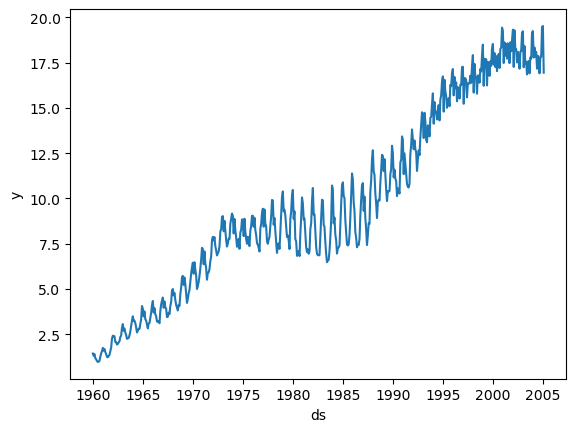

In [6]:
sns.lineplot(df, x='ds', y='y')

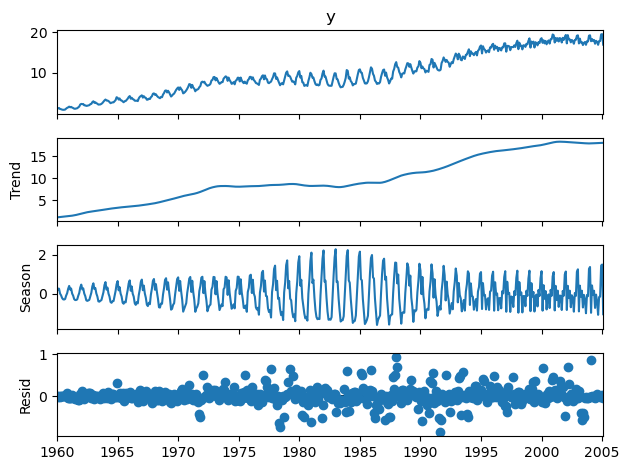

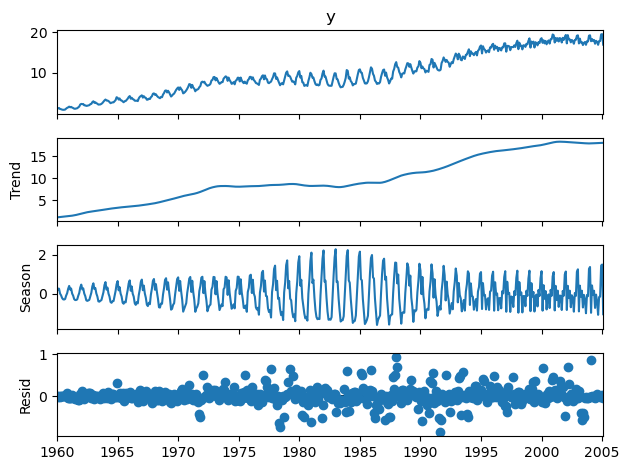

In [8]:
stl = STL(df["y"], period=12, robust=True)
res_stl = stl.fit()
res_stl.plot()

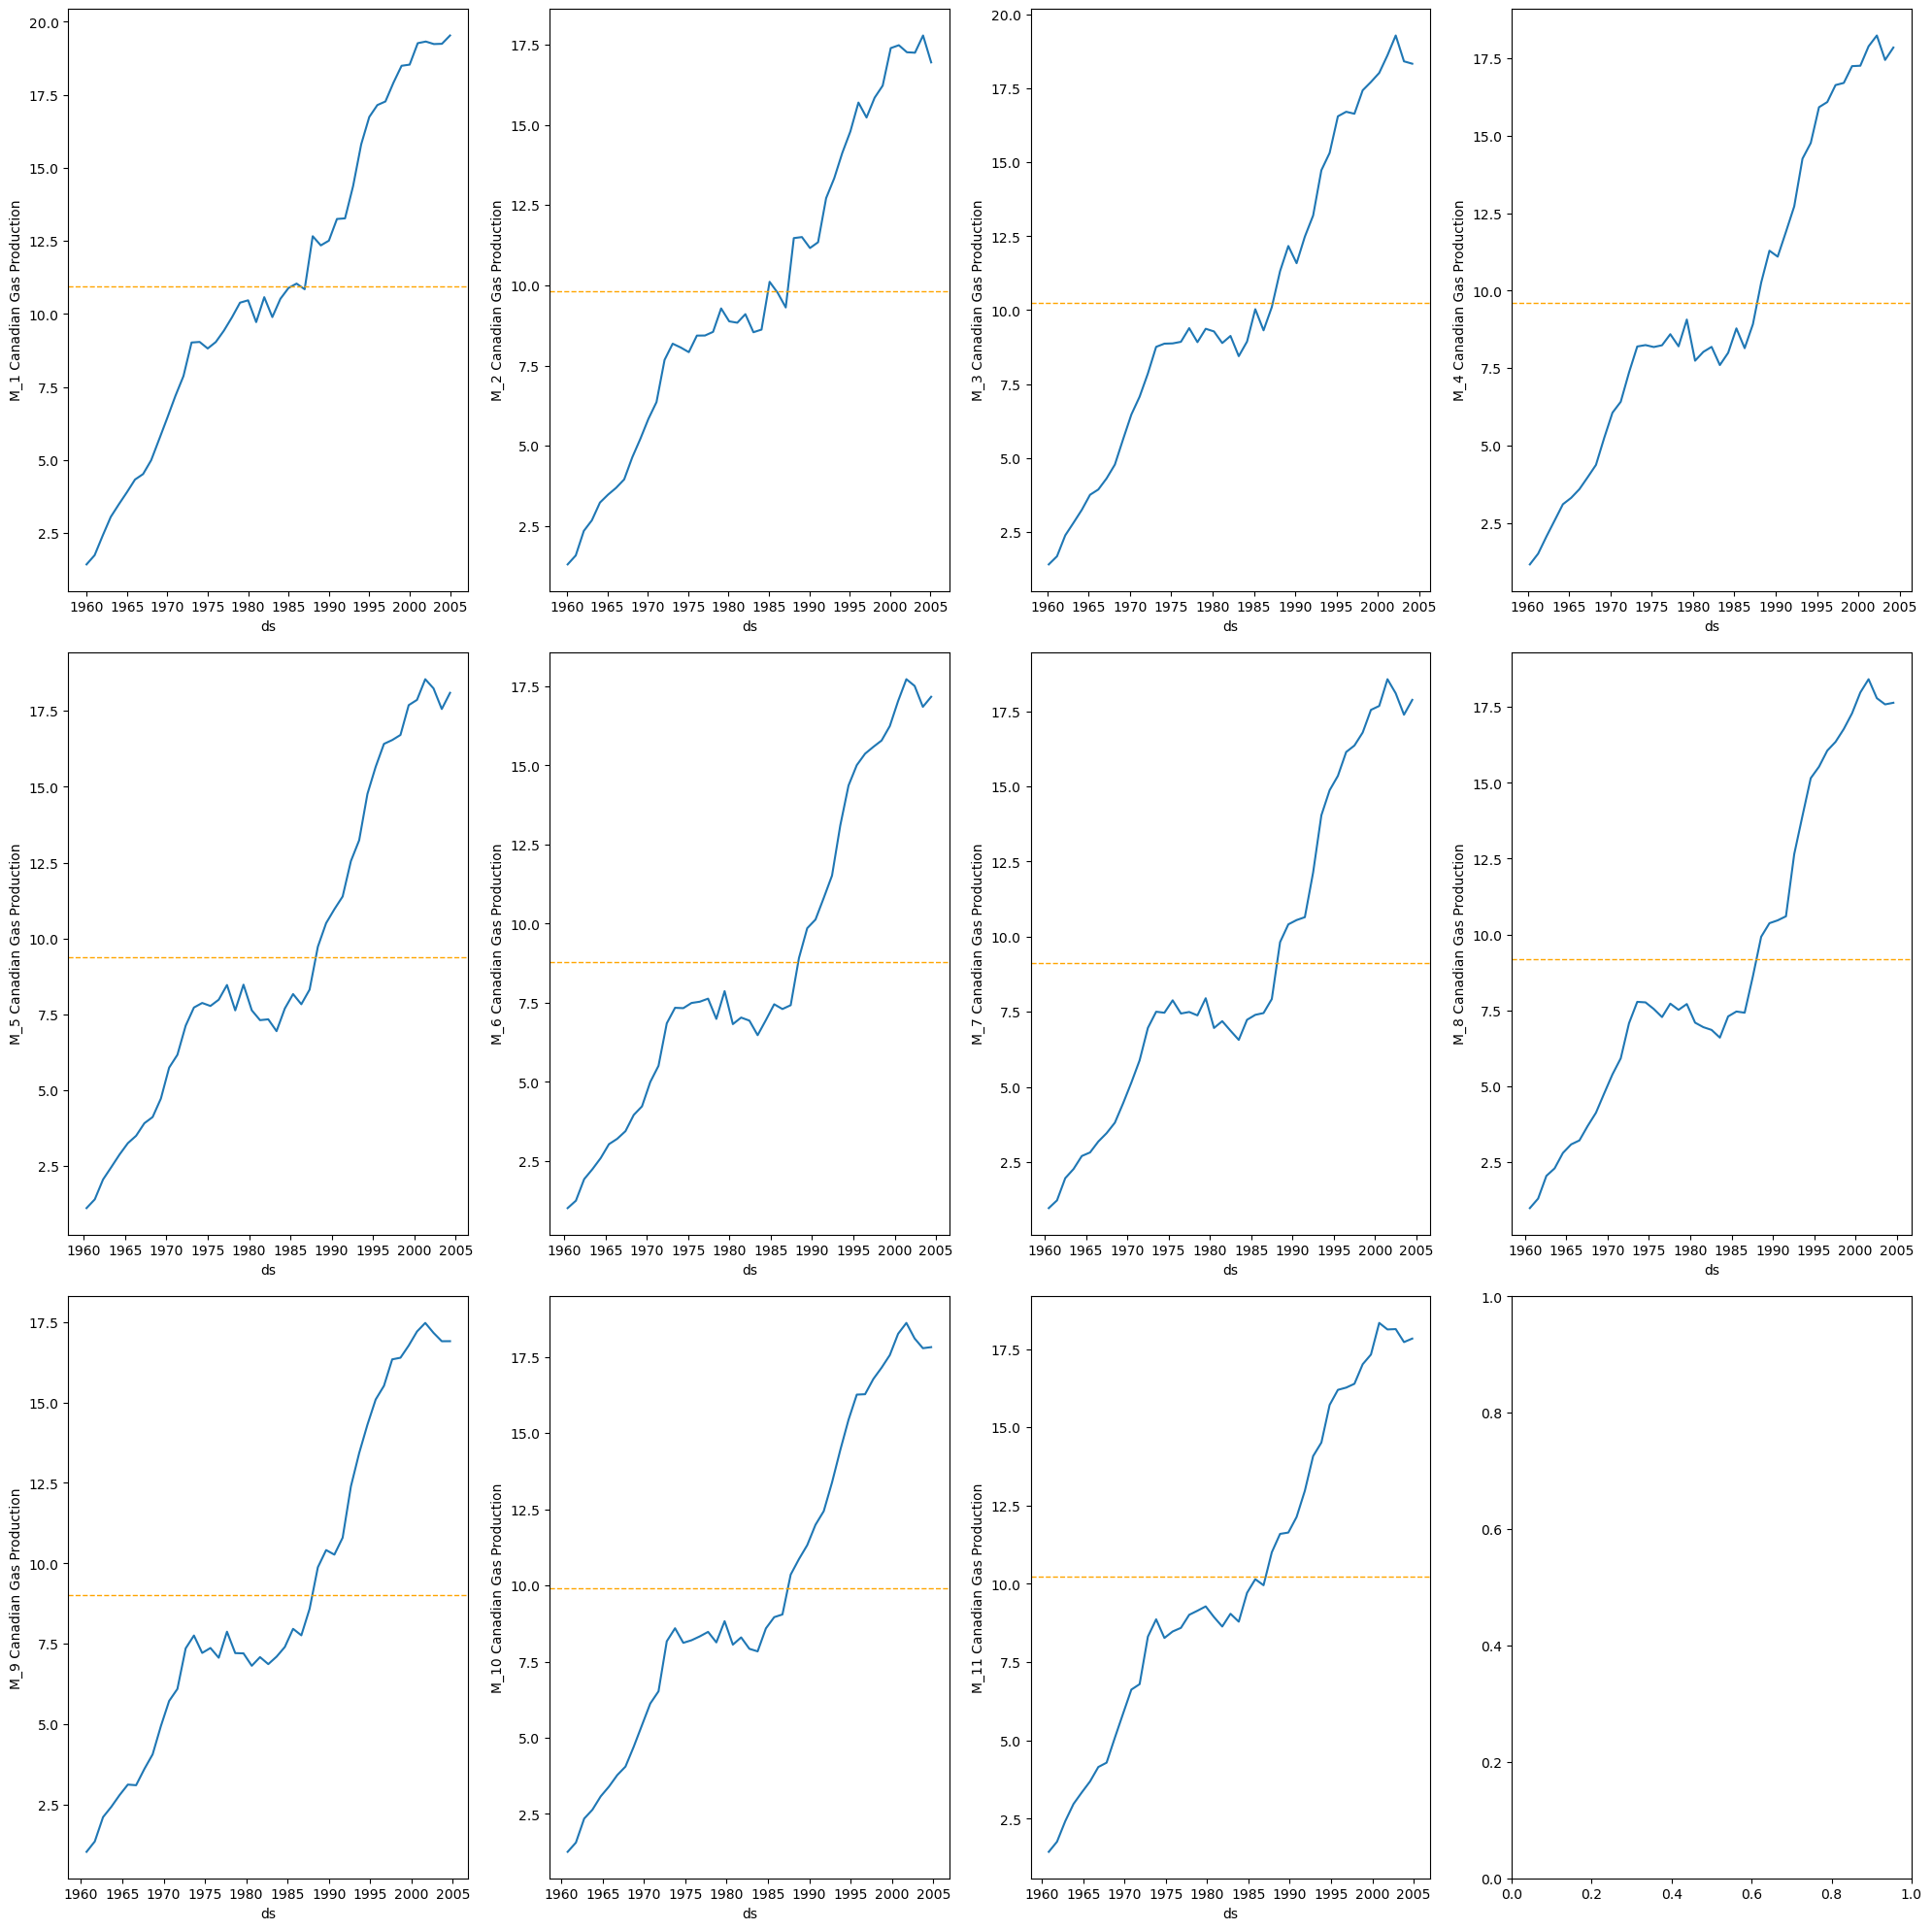

In [14]:
fig, axes = plt.subplots(3,4, figsize=(20,20))
months = range(1,12)

for month, ax in zip(months, axes.flatten()):
        include = df[df.index.month == month]
        
        mean_prod = include['y'].mean()

        sns.lineplot(include, x=include.index, y='y', ax=ax)
        ax.set_ylabel(f'M_{month} Canadian Gas Production')
        
        ax.axhline(
            mean_prod, color="orange", linestyle="--", linewidth=1, label="Average"
        )
plt.tight_layout()